In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # t-distributed Stochastic Neighbor Embedding
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec



In [2]:

nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saras\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    return stemmed_tokens


In [ ]:
#Preprocessing Text Data: Tokenization, Stopword Removal, and Stemming
#Before diving into word embeddings, it’s crucial to preprocess the text data. 
#This involves three key steps:

#Tokenization: Breaking the text into individual words (tokens).
#Stopword Removal: Removing common words like ‘the’, ‘and’, ‘is’, etc., that do not contribute much to the meaning.
#Stemming: Reducing words to their root form, e.g., ‘running’ to ‘run’, to simplify the data.

In [9]:
raw_text = """
I love Data Science. It is awesome!
Deep learning and natural language processing are very cool.
Artificial intelligence is the future.
"""

preprocessed_tokens = preprocess_text(raw_text)
print(preprocessed_tokens)


['love', 'data', 'scienc', 'awesom', 'deep', 'learn', 'natur', 'languag', 'process', 'cool', 'artifici', 'intellig', 'futur']


In [ ]:
#GloVe and Word2Vec: Two Powerful Word Embedding Techniques
#Global Vectors for Word Representation

#GloVe, short for “Global Vectors,” is a word embedding technique that uses co-occurrence statistics from a large text corpus. 
#It captures both global and local information by examining word pairs and their frequency in the corpus.

#GloVe like a treasure map. By examining the relationships between words in a text corpus, it uncovers hidden patterns and 
#creates word embeddings that capture the meaning of each word.

#Word2Vec: Continuous Bag-of-Words and Skip-gram Models
#Word2Vec is another popular word embedding technique that comes in two flavors: 
#Continuous Bag-of-Words (CBOW) and Skip-gram. CBOW predicts a target word based on its context, while Skip-gram predicts the context words 
#given a target word.

# Word2Vec is like a  jigsaw puzzle. It learns word embeddings by trying to fit words together based on their context, 
#creating a high-dimensional representation that captures the meaning of each word.

#Word2Vec converts words in a vector space representation. This vector representation is done such that similar words are placed close to each other
#while dissimilar words are way far apart. 
#Technically, word2vec uses the semantic relationship between words for vector representation.  

In [10]:
glove_embeddings = {}
with open("glove.6B.50d.txt", "r") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector



In [11]:
model = Word2Vec([preprocessed_tokens], min_count=1, vector_size=50, workers=4)

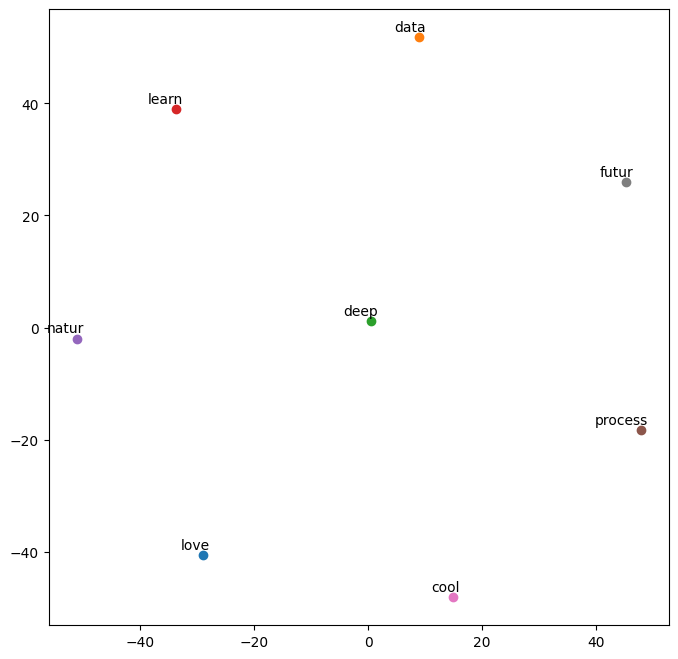

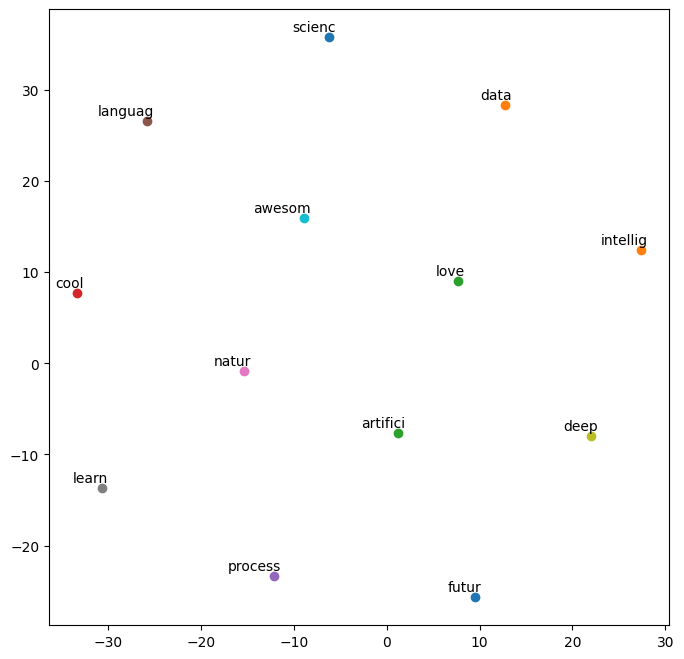

In [12]:
def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

# For GloVe
glove_words = [word for word in preprocessed_tokens if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)

# For Word2Vec
word2vec_words = model.wv.index_to_key
visualize_embeddings(model.wv, word2vec_words)


In [ ]:
#visualize_embeddings function  takes an embeddings dictionary and a list of words as input. 
#It uses t-SNE to project the embeddings onto a 2D space and plots them using Matplotlib. 
#To visualize the embeddings for GloVe and Word2Vec, we call the function with the respective embeddings and words.

#Running this code will display two plots, one for GloVe and one for Word2Vec, showing the 2D representation of the word embeddings. 
#The words are labeled, and you can see how words with similar meanings are grouped together in the 2D space

In [17]:
#Visual Representation of word embedding
import os

# Global parameters
#root folder
root_folder='.'
data_folder_name='data'
glove_filename='glove.6B.50d.txt'

#train_filename='train.csv'
# Variable for data directory
DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))
glove_path = os.path.abspath(os.path.join(DATA_PATH, glove_filename))

# Both train and test set are in the root data directory
train_path = DATA_PATH
test_path = DATA_PATH

#Relevant columns
TEXT_COLUMN = 'text'
TARGET_COLUMN = 'target'


from gensim.scripts.glove2word2vec import glove2word2vec

word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)

# This vocabulary contains 400K words represented by a feature vector of shape 100. 
# Now we can load the Glove embeddings in word2vec format and then analyze some analogies. 
# In this way, if we want to use pre-trained word2vec embeddings

C:\Users\saras\AppData\Local\Temp\ipykernel_14200\971449680.py:27: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


(400001, 50)

In [18]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
word2vec_output_file = glove_filename+'.word2vec'
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
 

#Show a word embedding
print('King: ',model.get_vector('king'))

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

print('Most similar word to King + Woman: ', result)


King:  [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Most similar word to King + Woman:  [('queen', 0.8523604273796082)]


In [19]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print('King - Man + Woman = ',result)

#The most famous is the following: king – man + woman = queen. 
#In other words, adding the vectors associated with the words king and woman while subtracting man is equal to the vector 
#associated with queen. In other words, by subtracting the concept of man from the concept of King we get a representation 
#of the "royalty". Then, if we sum to the woman word this concept we obtain the word "queen".

result = model.most_similar(positive=['rome', 'france'], negative=['paris'], topn=1)
print('France - Paris + Rome = ',result)

# In this case, the vector difference between Paris and France captures the concept of a country.

result = model.most_similar(positive=['english', 'france'], negative=['french'], topn=1)
print('France - french + english = ',result)
result = model.most_similar(positive=['june', 'december'], negative=['november'], topn=1)
print('December - November + June = ',result)
result = model.most_similar(positive=['sister', 'man'], negative=['woman'], topn=1)
print('Man - Woman + Sister = ',result)

King - Man + Woman =  [('queen', 0.8523604273796082)]
France - Paris + Rome =  [('italy', 0.8614554405212402)]
France - french + english =  [('england', 0.8093705177307129)]
December - November + June =  [('july', 0.9906676411628723)]
Man - Woman + Sister =  [('friend', 0.8550175428390503)]


In [20]:
result = model.most_similar(positive=['india'], topn=10)
print('10 most similar words to India: ',result)

result = model.most_similar(positive=['cricket'], topn=10)
print('\n10 most similar words to Cricket: ',result)

result = model.most_similar(positive=['engineer'], topn=10)
print('\n10 most similar words to Engineer: ',result)

10 most similar words to India:  [('indian', 0.8648794293403625), ('pakistan', 0.8529723286628723), ('malaysia', 0.8166508078575134), ('bangladesh', 0.8154239058494568), ('delhi', 0.8142766952514648), ('indonesia', 0.793914258480072), ('thailand', 0.786440908908844), ('sri', 0.7809486985206604), ('lanka', 0.7792482972145081), ('africa', 0.772837221622467)]

10 most similar words to Cricket:  [('indies', 0.8089948296546936), ('twenty20', 0.8088222146034241), ('rugby', 0.8044811487197876), ('cricketers', 0.7978312373161316), ('england', 0.7800653576850891), ('wc2003', 0.7499521374702454), ('wc2003-wis', 0.7357773780822754), ('bowling', 0.7342497110366821), ('mcc', 0.7253372669219971), ('zealand', 0.7152737379074097)]

10 most similar words to Engineer:  [('mechanic', 0.7610689401626587), ('technician', 0.7588813900947571), ('engineers', 0.7152684926986694), ('worked', 0.7083118557929993), ('pioneer', 0.7055997848510742), ('retired', 0.6979386806488037), ('chemist', 0.6946015357971191), (

In [21]:
result = model.similar_by_word("dog")
print(" Dog is similar to {}: {:.4f}".format(*result[0]))
result = model.similar_by_word("brother")
print(" Brother is similar to {}: {:.4f}".format(*result[0]))

 Dog is similar to cat: 0.9218
 Brother is similar to son: 0.9449
